In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load csv files to numpy arrays
def load_data(data_dir):
    train_data = open(data_dir + "train.csv").read()
    train_data = train_data.split("\n")[1:-1]
    train_data = [i.split(",") for i in train_data]
    # print(len(train_data))
    X_train = np.array([[int(i[j]) for j in range(1,len(i))] for i in train_data])
    y_train = np.array([int(i[0]) for i in train_data])

    # print(X_train.shape, y_train.shape)

    test_data = open(data_dir + "test.csv").read()
    test_data = test_data.split("\n")[1:-1]
    test_data = [i.split(",") for i in test_data]
    # print(len(test_data))
    X_test = np.array([[int(i[j]) for j in range(0,len(i))] for i in test_data])
    y_test = np.array([int(i[0]) for i in test_data])

    # print(X_test.shape)

    return X_train, y_train, X_test


class simple_knn():
    "a simple kNN with L2 distance"

    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.compute_distances(X)
        # print("computed distances")

        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            k_closest_y = []
            labels = self.y_train[np.argsort(dists[i,:])].flatten()
            # find k nearest lables
            k_closest_y = labels[:k]
            c = Counter(k_closest_y)
            y_pred[i] = c.most_common(1)[0][0]
        return(y_pred)

    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]

        dot_pro = np.dot(X, self.X_train.T)
        sum_square_test = np.square(X).sum(axis = 1)
        sum_square_train = np.square(self.X_train).sum(axis = 1)
        dists = np.sqrt(-2 * dot_pro + sum_square_train + np.matrix(sum_square_test).T)
        return(dists)
    
    def check(self, y_pred, y_validate):
        return np.sum(y_pred == y_validate) / len(y_validate)

In [5]:
# runs for 35 seconds
data_dir = "/Users/fengpeicheng/Desktop/"
X_train, y_train, X_test = load_data(data_dir)

In [6]:
# runs for 35 seconds
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.1, random_state = 33, stratify = y_train)

In [7]:
print(X_train.shape, X_validate.shape, X_test.shape)

(37800, 784) (4200, 784) (28000, 784)


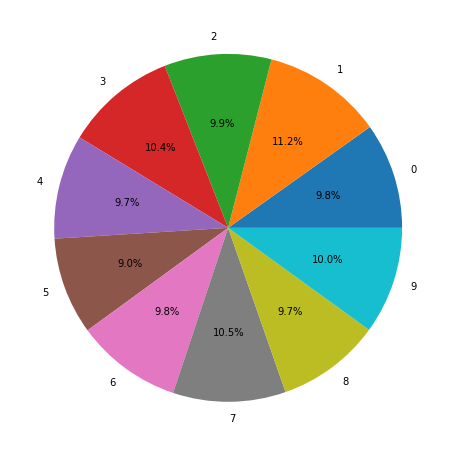

In [8]:
countTrainLabel = Counter(y_train)
labels = [str(i) for i in range(10)]
sizes = [countTrainLabel[i] for i in range(10)]
plt.pie(sizes, labels=labels, shadow=False, autopct = '%1.1f%%')
plt.show()

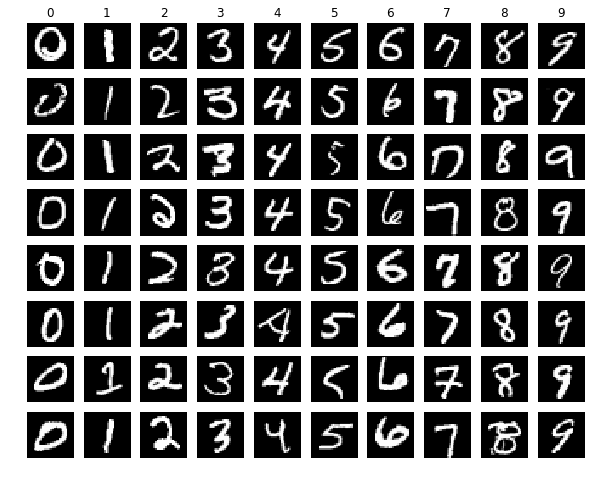

In [9]:
# runs for 10 seconds
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_classes = len(classes)
samples = 8

for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in y_train])
    idxs = np.random.choice(idxs[0], samples, replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        

plt.show()

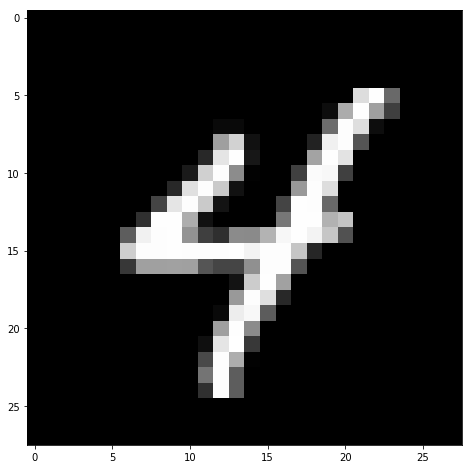

In [10]:
# just to visualize ith test image
plt.imshow(X_test[1234].reshape((28, 28)))

In [13]:
# predict labels for batch_size number of test images at a time.
batch_size = 2000
# k = 3
k = 1
classifier = simple_knn()
classifier.train(X_train, y_train)

In [14]:
for k in range(1, 10):
   tic = time.time()
   y_pre = classifier.predict(X_validate, k)
   print("when k is %d the accuracy is" %k, classifier.check(y_pre, y_validate))
   toc = time.time()
   print("cost time:", toc - tic)

when k is 1 the accuracy is 0.9676190476190476
cost time: 99.94477581977844
when k is 2 the accuracy is 0.9676190476190476
cost time: 110.54443025588989
when k is 3 the accuracy is 0.9673809523809523
cost time: 98.59533524513245
when k is 4 the accuracy is 0.9685714285714285
cost time: 99.50184607505798
when k is 5 the accuracy is 0.969047619047619
cost time: 108.1047990322113
when k is 6 the accuracy is 0.9688095238095238
cost time: 99.2827799320221
when k is 7 the accuracy is 0.9676190476190476
cost time: 96.4320068359375
when k is 8 the accuracy is 0.9661904761904762
cost time: 94.15889000892639
when k is 9 the accuracy is 0.9676190476190476
cost time: 107.76189494132996
